In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()
# 785 - 1 = 784
# 28 * 28 = 784

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train['label']

# drop 'label' column
X_train = train.drop(labels = ['label'], axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

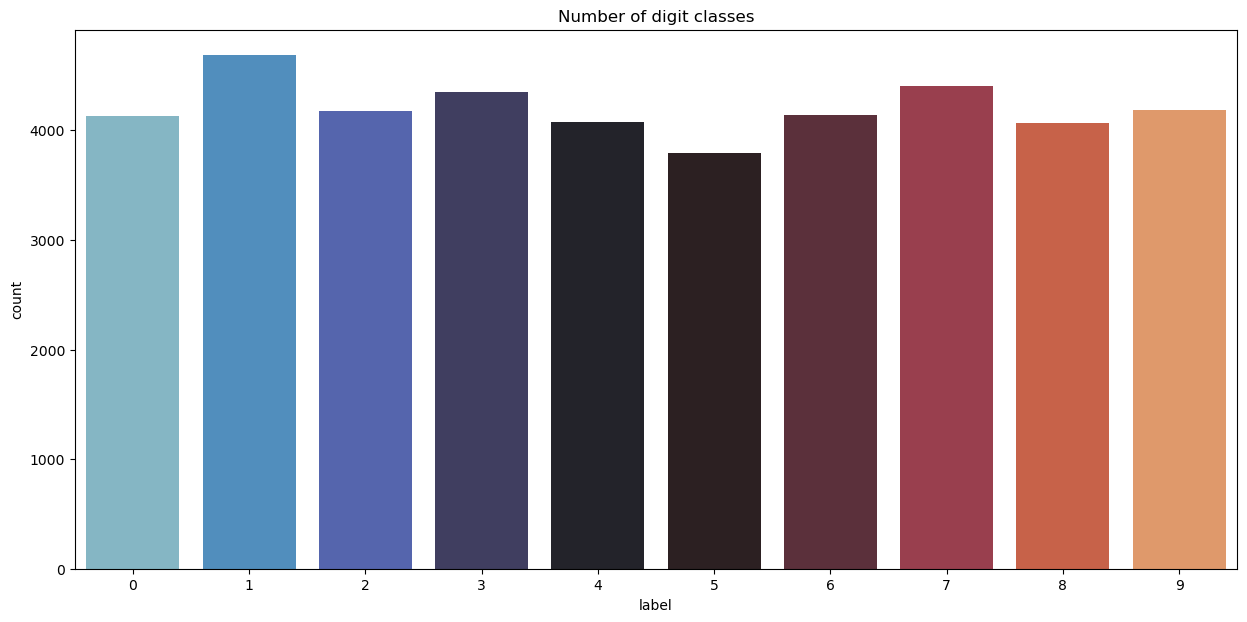

In [5]:
import seaborn as sns

# visualize number of digits classes
plt.figure(figsize = (15, 7))
g = sns.countplot(Y_train, palette = 'icefire')
plt.title('Number of digit classes')
Y_train.value_counts()

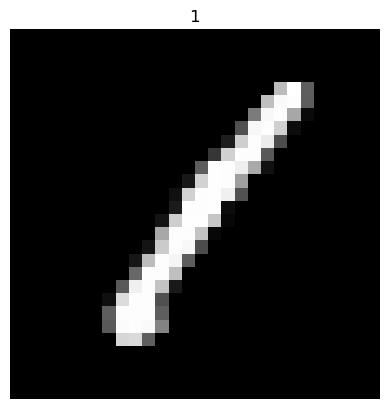

In [6]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[0, 0])
plt.axis('off')
plt.show()

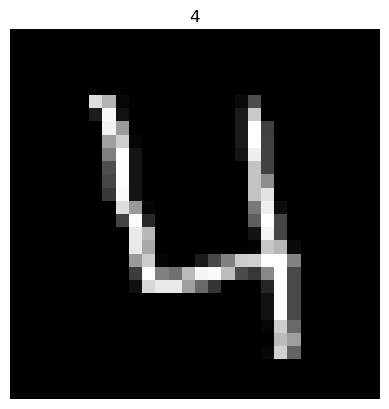

In [7]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[3, 0])
plt.axis('off')
plt.show()

#### Normalization - Reshape - Label Encoding

In [8]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print('x_train shape : ', X_train.shape)
print('x_test shape : ', test.shape)

x_train shape :  (42000, 784)
x_test shape :  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print('x_train shape : ', X_train.shape)
print('x_test shape : ', test.shape)

x_train shape :  (42000, 28, 28, 1)
x_test shape :  (28000, 28, 28, 1)


In [10]:
# Label Encoding
from keras.utils.np_utils import to_categorical    # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes=10)

#### Train - Test Split

In [11]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print('x_train shape : ', X_train.shape)
print('x_val shape : ', X_val.shape)
print('y_train shape : ', Y_train.shape)
print('y_val shape : ', Y_val.shape)

x_train shape :  (37800, 28, 28, 1)
x_val shape :  (4200, 28, 28, 1)
y_train shape :  (37800, 10)
y_val shape :  (4200, 10)


#### Convolutional Neural Networks (CNN)

##### Create Model

In [12]:
# Implementing with keras
# conv => max pool => dropout => conv => max pool => dropout => fully connected (2 hidden layer)
# Dropout : It is a technique where rendomly selected neurons are ignored during training

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Sequential öyle bir yapı ki içerisinde layerları barındırıyor. Modeli yaratmak için bu yapıyı kullanırız.
model = Sequential()

# Accuracy'nin iyi çıkmasından ziyade hızlı işlem yapmak istedim.
# 8 tane filtremiz var ve 5x5'lik filtrelerdir.
# Initial olarak input_shape vermemiz gerekiyor.
model.add(Conv2D(filters = 8, kernel_size = (5, 5), padding='Same', activation='relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 16 tane filtre var ve 3x3'lük filtrelerdir.
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

##### Define Optimizer

In [13]:
# Adam optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

##### Compile Model

In [14]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

##### Epochs and Batch Size

In [18]:
epochs = 10
batch_size = 250

##### Data Augmentation

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,     # set input mean to 0 over the dataset
        samplewise_center=False,      # set each sample mean to 0
        featurewise_std_normalization=False,   # divide inputs by std of the dataset
        samplewise_std_normalization=False,    # divide each input by its std
        zca_whitening=False,          # dimension reduction
        rotation_range=0.5,           # randomly rotate mages in the range 5 degrees
        zoom_range=0.5,               # randomly zoom image 5%
        width_shift_range=0.5,        # randomly shift images horizontally 5%
        height_shift_range=0.5,       # randomly shift images vertically 5%
        horizontal_flip=False,        # randomly flip images
        vertical_flip=False)          # randomly flip images

datagen.fit(X_train)

##### Fit the model

In [19]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                             epochs=epochs, validation_data=(X_val, Y_val), steps_per_epoch= X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 12s 74ms/step - loss: 2.1948 - accuracy: 0.1874 - val_loss: 1.8757 - val_accuracy: 0.3012
Epoch 2/10
151/151 [==============================] - 11s 75ms/step - loss: 1.8952 - accuracy: 0.3271 - val_loss: 1.1151 - val_accuracy: 0.7293
Epoch 3/10
151/151 [==============================] - 11s 73ms/step - loss: 1.7049 - accuracy: 0.4087 - val_loss: 0.7630 - val_accuracy: 0.8405
Epoch 4/10
151/151 [==============================] - 11s 73ms/step - loss: 1.5844 - accuracy: 0.4570 - val_loss: 0.5794 - val_accuracy: 0.8552
Epoch 5/10
151/151 [==============================] - 11s 72ms/step - loss: 1.5009 - accuracy: 0.4885 - val_loss: 0.4608 - val_accuracy: 0.8990
Epoch 6/10
151/151 [==============================] - 11s 74ms/step - loss: 1.4284 - accuracy: 0.5112 - val_loss: 0.3916 - val_accuracy: 0.9162
Epoch 7/10
151/151 [==============================] - 11s 75ms/step - loss: 1.3868 - accuracy: 0.5276 - val_loss: 0.3461 - val_accuracy:

##### Evaluate the Model

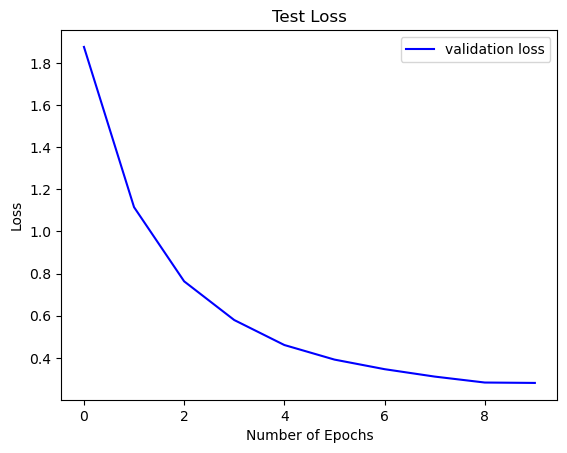

In [20]:
# Plot the loss and accuracy for training and validation
plt.plot(history.history['val_loss'], color = 'b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

132/132 [==============================] - 1s 3ms/step


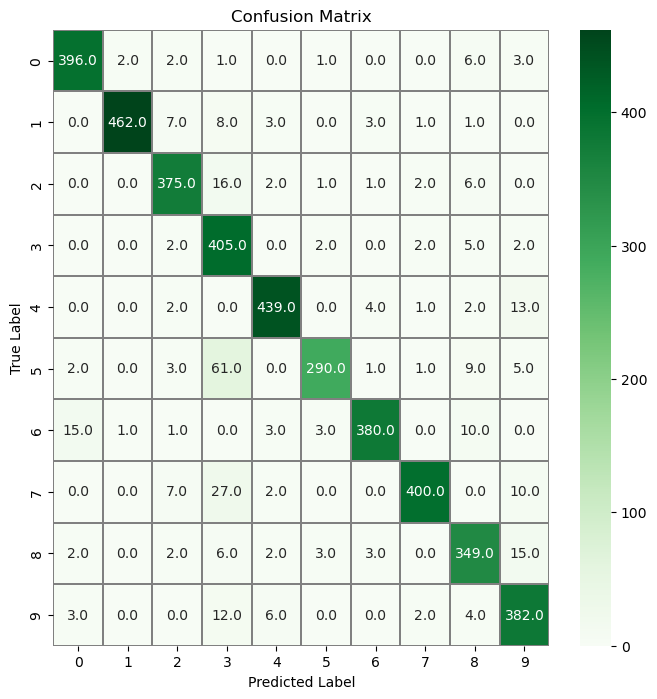

In [21]:
# Confusion Matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1)

# Compute the confusion matrix
confusion_mtrx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtrx, annot = True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt = '.1f', ax = ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

http://scs.ryerson.ca/~aharley/vis/conv/flat.html